In [1]:
# Importing necessary libraries
import pandas as pd  # Importing pandas library for data manipulation
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization
import seaborn as sns  # Importing seaborn for statistical data visualization

In [2]:
# Loading dataset from Excel file
dataset = pd.read_excel("HousePricePrediction.xlsx")

# Displaying the first 5 records of the dataset
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [4]:
# Check the dimensions of the dataset (number of rows and columns)
print(dataset.shape)

(2919, 13)


In [6]:
# Generating descriptive statistics for the dataset
dataset_description = dataset.describe()
print(dataset_description)

                Id   MSSubClass        LotArea  OverallCond    YearBuilt  \
count  2919.000000  2919.000000    2919.000000  2919.000000  2919.000000   
mean   1459.000000    57.137718   10168.114080     5.564577  1971.312778   
std     842.787043    42.517628    7886.996359     1.113131    30.291442   
min       0.000000    20.000000    1300.000000     1.000000  1872.000000   
25%     729.500000    20.000000    7478.000000     5.000000  1953.500000   
50%    1459.000000    50.000000    9453.000000     5.000000  1973.000000   
75%    2188.500000    70.000000   11570.000000     6.000000  2001.000000   
max    2918.000000   190.000000  215245.000000     9.000000  2010.000000   

       YearRemodAdd   BsmtFinSF2  TotalBsmtSF      SalePrice  
count   2919.000000  2918.000000  2918.000000    1460.000000  
mean    1984.264474    49.582248  1051.777587  180921.195890  
std       20.894344   169.205611   440.766258   79442.502883  
min     1950.000000     0.000000     0.000000   34900.000000  


In [23]:
# Identifying categorical variables in the dataset
obj = (dataset.dtypes == 'object')  # Creating a boolean series to check if the datatype is 'object'
object_cols = list(obj[obj].index)  # Extracting column names where the datatype is 'object'
print("Categorical variables:", len(object_cols))  # Printing the count of categorical variables

# Identifying integer variables in the dataset
int_ = (dataset.dtypes == 'int')  # Creating a boolean series to check if the datatype is 'int'
num_cols = list(int_[int_].index)  # Extracting column names where the datatype is 'int'
print("Integer variables:", len(num_cols))  # Printing the count of integer variables

# Identifying float variables in the dataset
fl = (dataset.dtypes == 'float')  # Creating a boolean series to check if the datatype is 'float'
fl_cols = list(fl[fl].index)  # Extracting column names where the datatype is 'float'
print("Float variables:", len(fl_cols))  # Printing the count of float variables


Categorical variables: 4
Integer variables: 6
Float variables: 3


<ipython-input-26-a40447b196af>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




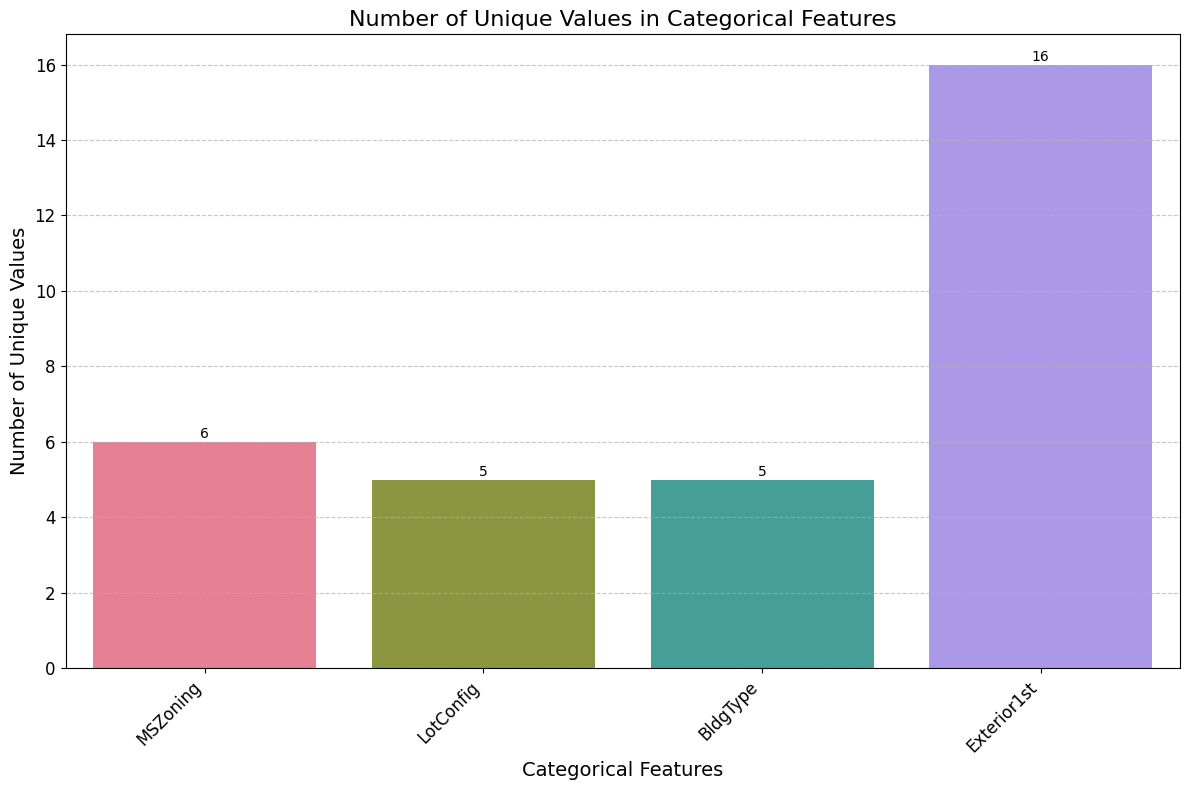

In [26]:
# Generating unique colors for each bar
colors = sns.color_palette('husl', len(object_cols))

# Creating a bar plot with a unique structure and color scheme
plt.figure(figsize=(12, 8))
sns.barplot(x=object_cols, y=unique_values, palette=colors)
plt.title('Number of Unique Values in Categorical Features', fontsize=16)
plt.xlabel('Categorical Features', fontsize=14)
plt.ylabel('Number of Unique Values', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels to the bars
for i, val in enumerate(unique_values):
    plt.text(i, val + 0.1, str(val), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

<ipython-input-29-de0d19dce8b3>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-29-de0d19dce8b3>:25: UserWarning:

The palette list has more values (10) than needed (5), which may not be intended.

<ipython-input-29-de0d19dce8b3>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-29-de0d19dce8b3>:25: UserWarning:

The palette list has more values (10) than needed (5), which may not be intended.

<ipython-input-29-de0d19dce8b3>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-29-de0d19dce8b3>:25: UserWarning:

The palette list has 

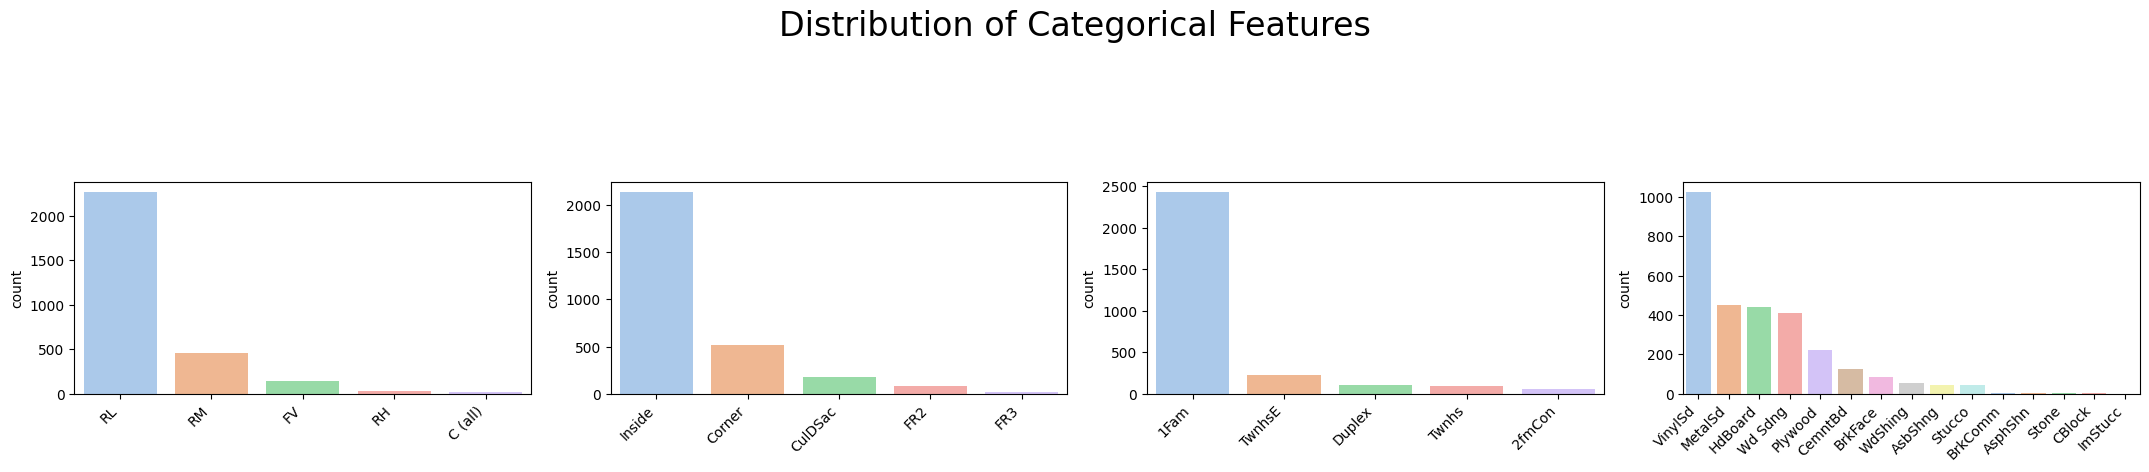

In [29]:
# Custom color palette for bars
custom_palette = sns.color_palette('pastel')

# Custom figure size
plt.figure(figsize=(24, 36))

# Custom title
plt.suptitle('Distribution of Categorical Features', fontsize=24)

# Counter for subplot index
index = 1

# Loop through each categorical feature
for col in object_cols:
    # Get value counts for the current feature
    y = dataset[col].value_counts()

    # Create subplot
    plt.subplot(11, 4, index)

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right', fontsize=10)

    # Custom bar plot with pastel colors
    sns.barplot(x=list(y.index), y=y, palette=custom_palette)

    # Increment subplot index
    index += 1

# Adjust layout
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

# Show plot
plt.show()


In [30]:
# Dropping the 'Id' column from the dataset
dataset.drop(['Id'],  # Specify the column to drop
            axis=1,  # Specify to drop along columns (axis=1)
            inplace=True)  # Modifying the dataset in place


In [31]:
# Filling missing values in the 'SalePrice' column with the mean of the column
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())


In [32]:
# Creating a new dataset by removing rows with any missing values
new_dataset = dataset.dropna()


In [33]:
# Checking for missing values in the new dataset
missing_values_count = new_dataset.isnull().sum()
print(missing_values_count)


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64


In [34]:
# Importing OneHotEncoder from scikit-learn
from sklearn.preprocessing import OneHotEncoder

# Identifying categorical variables in the new dataset
s = (new_dataset.dtypes == 'object')  # Creating a boolean series to check if the datatype is 'object'
object_cols = list(s[s].index)  # Extracting column names where the datatype is 'object'
print("Categorical variables:")  # Printing a label for categorical variables
print(object_cols)  # Printing the names of categorical variables
print('No. of categorical features: ', len(object_cols))  # Printing the count of categorical features


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of categorical features:  4


In [36]:
# Initializing OneHotEncoder with sparse=False
OH_encoder = OneHotEncoder(sparse=False)

# Encoding categorical variables and creating a DataFrame
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))

# Setting index of OH_cols to match the index of new_dataset
OH_cols.index = new_dataset.index

# Naming columns of OH_cols manually
OH_cols.columns = OH_cols.columns.astype(str)

# Creating the final DataFrame by dropping original categorical columns and concatenating one-hot encoded columns
df_final = new_dataset.drop(object_cols, axis=1)  # Dropping original categorical columns
df_final = pd.concat([df_final, OH_cols], axis=1)  # Concatenating one-hot encoded columns


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [38]:
# Importing necessary libraries
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Separating features (X) and target variable (Y)
X = df_final.drop(['SalePrice'], axis=1)  # Features
Y = df_final['SalePrice']  # Target variable

# Splitting the dataset into training and validation sets
# Train size: 80%, Validation size: 20%
# Random state set for reproducibility
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [39]:
# Importing Support Vector Machine (SVM) related libraries
from sklearn import svm
from sklearn.svm import SVC

# Importing mean absolute percentage error metric
from sklearn.metrics import mean_absolute_percentage_error

# Initializing Support Vector Regression (SVR) model
model_SVR = svm.SVR()

# Fitting SVR model on the training data
model_SVR.fit(X_train, Y_train)

# Making predictions on the validation set
Y_pred = model_SVR.predict(X_valid)

# Calculating and printing mean absolute percentage error
print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1870512931870423


In [40]:
# Importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initializing Random Forest Regressor model with 10 estimators
model_RFR = RandomForestRegressor(n_estimators=10)

# Fitting Random Forest Regressor model on the training data
model_RFR.fit(X_train, Y_train)

# Making predictions on the validation set
Y_pred = model_RFR.predict(X_valid)

# Calculating mean absolute percentage error
mean_absolute_percentage_error(Y_valid, Y_pred)


0.19754707096214763

In [41]:
# Importing Linear Regression model
from sklearn.linear_model import LinearRegression

# Initializing Linear Regression model
model_LR = LinearRegression()

# Fitting Linear Regression model on the training data
model_LR.fit(X_train, Y_train)

# Making predictions on the validation set
Y_pred = model_LR.predict(X_valid)

# Printing mean absolute percentage error
print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.18741683841599854
